# Interpretable Machine Learning
## Exercise Sheet: 5
## This exercise sheet covers chapters 8.3 and 8.5 from the IML book by Christoph Molnar

Kristin Blesch (blesch@leibniz-bips.de)<br>
Niklas Koenen (koenen@leibniz-bips.de)
<hr style="border:1.5px solid gray"> </hr>

# 1) Feature Interaction

## Explain feature interaction and give an example. What challenges arise for interpretability methods? 

From 8.3.: "The interaction between two features is the change in the prediction that occurs by varying the features after considering the individual feature effects." This means that "the prediction cannot be expressed as the sum of the feature effects, because the effect of one feature depends on the value of the other feature" and hence we need to take this into consideration for interpretation.

# 2) Permutation Feature Importance

#### a) What is permutation feature importance? Does this importance measure take into account feature interaction explicitly?  



From 8.5.: "We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature. A feature is “important” if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction. A feature is “unimportant” if shuffling its values leaves the model error unchanged, because in this case the model ignored the feature for the prediction."

Permuting the features does not only break the association between features and outcome, but also breaks the association between features. Hence, this importance measure disregards feature interaction.

#### b) Remember that we had fitted a decision tree classifier to the iris data set two weeks ago. For this model, calculate the permutation feature importance.


In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
print(iris.target_names)
print(iris.feature_names)
model = tree.DecisionTreeClassifier()
model = model.fit(iris.data, iris.target)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
from sklearn.inspection import permutation_importance

In [8]:
result = permutation_importance(model, iris.data, iris.target, n_repeats=10,random_state=0)
result

{'importances_mean': array([0.012     , 0.        , 0.152     , 0.52533333]),
 'importances_std': array([0.00653197, 0.        , 0.01995551, 0.03357248]),
 'importances': array([[0.00666667, 0.01333333, 0.02      , 0.00666667, 0.02      ,
         0.00666667, 0.        , 0.01333333, 0.01333333, 0.02      ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.16      , 0.16      , 0.18      , 0.18666667, 0.14      ,
         0.15333333, 0.12      , 0.14666667, 0.14666667, 0.12666667],
        [0.53333333, 0.58      , 0.48666667, 0.52666667, 0.50666667,
         0.53333333, 0.54      , 0.54666667, 0.45333333, 0.54666667]])}

#### c) Visualize the permutation feature importance results, i.e. plot the mean variable importances and the according standard deviations


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(result.importances_mean, index=iris.feature_names)

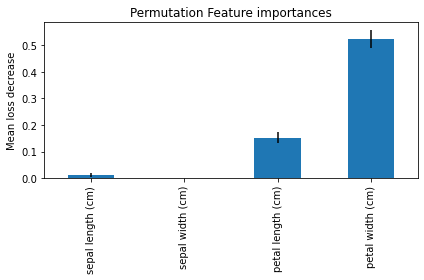

In [17]:
fig, ax = plt.subplots()
importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Permutation Feature importances")
ax.set_ylabel("Mean loss decrease")
fig.tight_layout()
plt.show()

#### d) BONUS: Using imported libraries is easy, but can you fill out the gaps in the hand-coded permutation feature importance algorithm below? 